# RecSys Project - Casino Recommendations - EDA

## Imports

In [1]:
import pickle
from typing import Set, List, Optional

import numpy as np
import pandas as pd
import pdpipe as pdp
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [2]:
pd.options.display.float_format = '${:,.2f}'.format

## Data Loading

In [3]:
from recasino.data import (
    Col,
    set_data_dpath,
    get_raw_dataframe,
)

In [4]:
data_dpath = '/Users/shaypalachy/data/mba/recsys/project/'

In [5]:
set_data_dpath(data_dpath)

### Load processed data

In [6]:
import pickle

In [7]:
with open('weekly_per_user_and_game_bets.pkl', 'rb') as f:
    weekly_per_user_and_game_bets = pickle.load(f)

<AxesSubplot:>

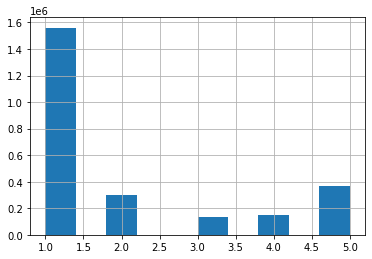

In [8]:
weekly_per_user_and_game_bets[Col.RATING].hist()

In [9]:
weekly_per_user_and_game_bets

Country_ID  VendorID       Bets  rating
CID       week GameType_ID                                         
35485     1    611                 798         7 $18,492.08       5
          2    611                 684         6 $12,140.98       5
          4    611                 342         3  $6,537.30       5
          5    611                 798         7 $13,700.31       5
          6    611                 570         5  $6,064.10       5
...                                ...       ...        ...     ...
838502307 5    1035                234        21      $8.99       4
          7    1035                468        42     $46.11       5
838502409 1    438                 234         1      $2.33       2
               483                 234         1      $2.13       2
               954                 234        35      $2.76       2

[2506620 rows x 4 columns]

In [10]:
weekly_per_user_and_game_ratings = weekly_per_user_and_game_bets[[Col.RATING]]

In [11]:
weekly_per_user_and_game_ratings

rating
CID       week GameType_ID        
35485     1    611               5
          2    611               5
          4    611               5
          5    611               5
          6    611               5
...                            ...
838502307 5    1035              4
          7    1035              5
838502409 1    438               2
               483               2
               954               2

[2506620 rows x 1 columns]

## Train-val-test splits

In [49]:
LAST_TRAINVAL_WEEK = 7

In [51]:
TRAINVAL_WEEKS = list(range(1, LAST_TRAINVAL_WEEK+1))
TRAINVAL_WEEKS

[1, 2, 3, 4, 5, 6, 7]

In [52]:
TEST_WEEKS = list(range(LAST_TRAINVAL_WEEK+1, 10))
TEST_WEEKS

[8, 9]

### Prototype

In [12]:
LAST_TRAIN_WEEK = 4

In [13]:
TRAIN_WEEKS = list(range(1, LAST_TRAIN_WEEK+1))
TRAIN_WEEKS

[1, 2, 3, 4]

In [14]:
TEST_WEEKS = list(range(LAST_TRAIN_WEEK+1, 10))
TEST_WEEKS

[5, 6, 7, 8, 9]

In [15]:
train_weekly_per_user_and_game_ratings = weekly_per_user_and_game_ratings.loc[:,TRAIN_WEEKS,:]
train_weekly_per_user_and_game_ratings

rating
CID       week GameType_ID        
35485     1    611               5
          2    611               5
          4    611               5
57638     1    515               5
               890               1
...                            ...
838502174 1    2196              1
838502307 4    1035              4
838502409 1    438               2
               483               2
               954               2

[1171937 rows x 1 columns]

In [16]:
test_weekly_per_user_and_game_ratings = weekly_per_user_and_game_ratings.loc[:,TEST_WEEKS,:]
test_weekly_per_user_and_game_ratings

rating
CID       week GameType_ID        
35485     5    611               5
          6    611               5
          7    611               5
          9    611               5
               834               1
...                            ...
838502065 9    2282              1
               2305              1
               2360              2
838502307 5    1035              4
          7    1035              5

[1334683 rows x 1 columns]

In [17]:
pd.set_option('display.max_rows', 5000)

In [18]:
test_weekly_per_user_and_game_ratings.iloc[0:1000]

rating
CID     week GameType_ID        
35485   5    611               5
        6    611               5
        7    611               5
        9    611               5
             834               1
44472   5    483               5
        6    483               4
        7    483               5
57638   5    459               1
             485               2
             515               5
             516               1
             526               1
             533               1
             559               2
             563               1
             616               1
             631               1
             744               1
             757               1
             766               1
             784               1
             805               1
             867               3
             934               1
             960               1
             962               4
             1057              1
             1126              1
             1146              1
             1193              1
             1215              1
             1298              2
             1312              1
             1317              1
             1332              1
             1333              1
             1357              2
             1358              1
             1372              1
             1373              1
             1744              2
             1773              1
             1774              1
             1776              1
             1785              1
             1822              1
             1852              1
             1853              2
             1854              1
             1884              1
             2141              1
             2160              1
             2161              1
             2196              2
             2254              1
             2258              1
             2270              1
             2275              1
             2276              1
             2277              1
             2287              1
             2323              1
        6    465               1
             515               5
             563               1
             766               1
             960               1
             962               2
             1053              1
             1055              1
             1057              1
             1223              1
             1298              1
             1357              2
             1359              1
             1360              1
             2160              1
             2253              1
             2276              1
             2347              1
106242  8    459               1
             933               5
131292  5    483               1
             1007              1
             1295              3
             1869              5
             2155              5
             2159              3
        6    483               1
             1009              2
             1295              1
             1298              1
             1822              4
             1869              4
             1884              2
             2100              3
             2155              5
             2159              1
             2258              2
             2300              1
             2301              1
        7    602               1
             1295              4
             1822              3
             1869              5
             1884              1
             2100              1
             2125              1
             2155              5
             2501              1
        8    510               2
             1009              2
             1018              4
             1295              4
             1426              1
             1869              4
             2100              1
             2155              5
             2358              4


In [19]:
test_weekly_per_user_and_game_ratings.groupby(level=[0,2]).max().loc[(44472, 483)]

rating    5
Name: (44472, 483), dtype: int64

In [20]:
train_per_user_and_game_ratings = train_weekly_per_user_and_game_ratings.groupby(level=[0,2]).max()

In [21]:
train_per_user_and_game_ratings

rating
CID       GameType_ID        
35485     611               5
57638     459               2
          465               1
          497               2
          515               5
...                       ...
838502174 2196              1
838502307 1035              4
838502409 438               2
          483               2
          954               2

[965787 rows x 1 columns]

In [22]:
test_per_user_and_game_ratings = test_weekly_per_user_and_game_ratings.groupby(level=[0,2]).max()
test_per_user_and_game_ratings

rating
CID       GameType_ID        
35485     611               5
          834               1
44472     483               5
57638     459               1
          465               1
...                       ...
838502065 2348              1
          2360              4
          2413              1
          2501              2
838502307 1035              5

[1046348 rows x 1 columns]

In [24]:
test_per_user_and_game_ratings = test_per_user_and_game_ratings.reset_index()
test_per_user_and_game_ratings

,CID,GameType_ID,rating
0,35485,611,5
1,35485,834,1
2,44472,483,5
3,57638,459,1
4,57638,465,1
...,...,...,...
1046343,838502065,2348,1
1046344,838502065,2360,4
1046345,838502065,2413,1
1046346,838502065,2501,2


In [26]:
test_per_user_and_game_ratings = test_per_user_and_game_ratings[[Col.USER, Col.GAME, Col.RATING]]
test_per_user_and_game_ratings.columns = ['user', 'item', 'rating']
test_per_user_and_game_ratings

,user,item,rating
0,35485,611,5
1,35485,834,1
2,44472,483,5
3,57638,459,1
4,57638,465,1
...,...,...,...
1046343,838502065,2348,1
1046344,838502065,2360,4
1046345,838502065,2413,1
1046346,838502065,2501,2


### functionalize

In [40]:
import matplotlib.pyplot as plt

In [66]:
def get_subset_by_weeks(
    weekly_per_user_and_game_ratings: pd.DataFrame,
    weeks: List[int],
) -> pd.DataFrame:
    print(f"Creating set for weeks: {weeks}.")
    sub_weekly_per_user_and_game_ratings = weekly_per_user_and_game_ratings.loc[:,weeks,:] 
    sub_per_user_and_game_ratings = sub_weekly_per_user_and_game_ratings.groupby(level=[0,2]).max()
    sub_per_user_and_game_ratings[Col.RATING].hist();
    plt.show()
    sub_per_user_and_game_ratings = sub_per_user_and_game_ratings.reset_index()
    sub_per_user_and_game_ratings = sub_per_user_and_game_ratings[[Col.USER, Col.GAME, Col.RATING]]
    sub_per_user_and_game_ratings.columns = ['user', 'item', 'rating']
    return sub_per_user_and_game_ratings

In [67]:
def create_and_save_train_val(
    weekly_per_user_and_game_ratings: pd.DataFrame,
    last_train_week: int,
) -> None:
    TRAIN_WEEKS = list(range(1, last_train_week+1))
    VAL_WEEKS = list(range(last_train_week+1, LAST_TRAINVAL_WEEK+1))
    print(f"Creating train-val sets for train weeks: {TRAIN_WEEKS}\nval weeks: {VAL_WEEKS}")
    
    train_per_user_and_game_ratings = get_subset_by_weeks(
        weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
        weeks=TRAIN_WEEKS,
    )
    train_per_user_and_game_ratings.to_csv(
        f'data/train_for_week_{last_train_week}.csv', header=False, index=False)

    val_per_user_and_game_ratings = get_subset_by_weeks(
        weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
        weeks=VAL_WEEKS,
    )
    val_per_user_and_game_ratings.to_csv(
        f'data/val_for_week_{last_train_week}.csv', header=False, index=False)

Creating train-val sets for train weeks: [1, 2, 3, 4]
val weeks: [5, 6, 7]
Creating set for weeks: [1, 2, 3, 4].


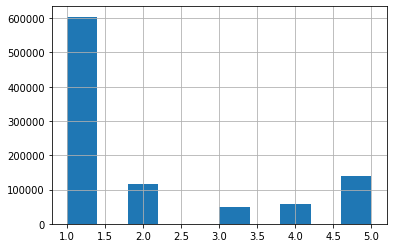

Creating set for weeks: [5, 6, 7].


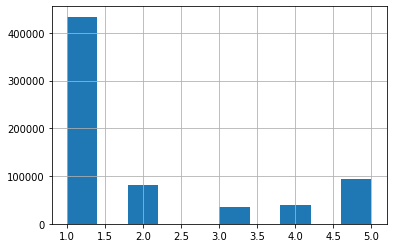

In [68]:
create_and_save_train_val(
    weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
    last_train_week=4,
)

Creating train-val sets for train weeks: [1, 2, 3, 4, 5]
val weeks: [6, 7]
Creating set for weeks: [1, 2, 3, 4, 5].


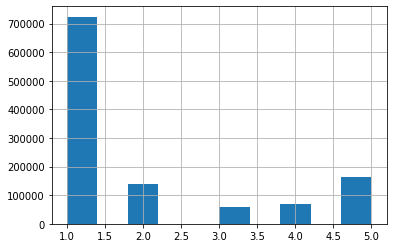

Creating set for weeks: [6, 7].


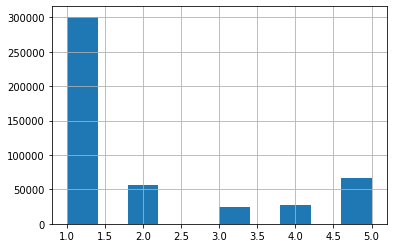

In [69]:
create_and_save_train_val(
    weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
    last_train_week=5,
)

Creating train-val sets for train weeks: [1, 2, 3, 4, 5, 6]
val weeks: [7]
Creating set for weeks: [1, 2, 3, 4, 5, 6].


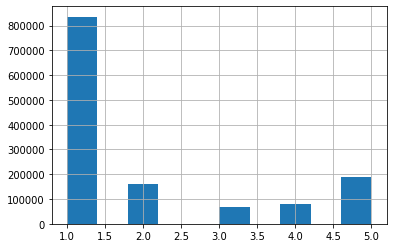

Creating set for weeks: [7].


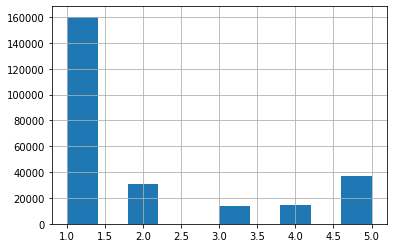

In [70]:
create_and_save_train_val(
    weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
    last_train_week=6,
)

Creating set for weeks: [1, 2, 3, 4, 5, 6, 7].


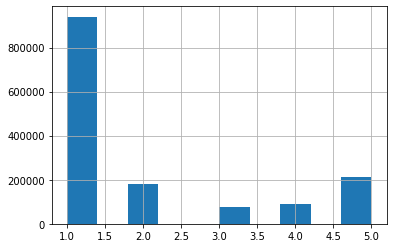

In [71]:
trainval_per_user_and_game_ratings = get_subset_by_weeks(
    weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
    weeks=TRAINVAL_WEEKS,
)
trainval_per_user_and_game_ratings.to_csv(
    f'data/trainval_weeks_1_to_{LAST_TRAINVAL_WEEK}.csv', header=False, index=False)

Creating set for weeks: [8, 9].


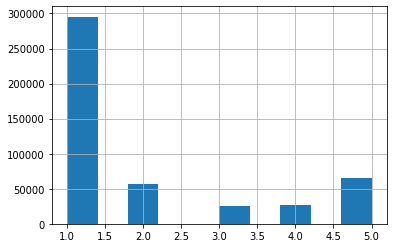

In [72]:
test_per_user_and_game_ratings = get_subset_by_weeks(
    weekly_per_user_and_game_ratings=weekly_per_user_and_game_ratings,
    weeks=TEST_WEEKS,
)
test_per_user_and_game_ratings.to_csv(
    f'data/test_weeks_{LAST_TRAINVAL_WEEK+1}_to_9.csv', header=False, index=False)